In [1]:
import os
import sys
import pandas as pd

project_path = os.path.abspath('..')
if project_path not in sys.path:
    sys.path.append(project_path)

os.chdir(project_path)

from p2p_lending.get_data import get_data
from p2p_lending.preprocess_data import preprocess_data
pd.options.mode.copy_on_write = True

In [2]:
print(os.getcwd())
filtered_data = get_data("p2p_lending/data/accepted_2007_to_2018q4.csv", use_cache=True)
processed_data = preprocess_data(filtered_data)

c:\Users\Jonah\Documents\gitRepos\Pre-project-transformer


In [4]:
filtered_data.head()


,loan_status,loan_amnt,term,int_rate,purpose,fico_range_low,grade,inq_last_6mths,revol_util,delinq_2yrs,...,total_acc,annual_inc,emp_length,home_ownership,verification_status,dti,desc,credit_age,revolving_income_ratio,desc_length
1180006,Fully Paid,10.239960,36 months,7.12,debt_consolidation,715.0,A,0.0,49.6,0.0,...,40.0,11.512925,2.0,MORTGAGE,Verified,19.13,I support myself and my mother and have taken ...,232.333333,11.832000,36
1212721,Charged Off,10.126631,36 months,16.99,debt_consolidation,660.0,D,0.0,66.3,0.0,...,17.0,11.156251,1.0,RENT,Verified,10.50,Trying to pay a friend back for apartment brok...,172.466667,5.142857,20
1226216,Fully Paid,9.405084,36 months,14.99,debt_consolidation,680.0,C,1.0,49.3,1.0,...,57.0,10.657259,1.0,OWN,Verified,19.51,"Dear Lenders, I have gotten into debt by bein...",241.433333,6.352941,121
1309223,Charged Off,8.294050,36 months,17.57,medical,685.0,D,0.0,24.9,0.0,...,9.0,10.714418,3.0,RENT,Not Verified,20.16,to pay medical bill medical bill.hospital I wa...,92.300000,2.746667,29
1309250,Fully Paid,9.392662,36 months,9.67,debt_consolidation,685.0,B,0.0,52.2,0.0,...,15.0,10.645425,2.0,MORTGAGE,Not Verified,11.71,The loan is to consolidate all high interest c...,87.200000,1.828571,22


In [5]:
processed_data.head()

,loan_status,loan_amnt,int_rate,fico_range_low,inq_last_6mths,revol_util,delinq_2yrs,pub_rec,open_acc,total_acc,...,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,home_ownership_MORTGAGE,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified
1936900,1,8.699515,0.0603,760.0,0.0,0.186,0.0,0.0,10.0,28.0,...,False,False,False,False,True,False,False,False,True,False
1645429,1,8.699515,0.1322,680.0,2.0,0.859,0.0,0.0,12.0,35.0,...,False,False,False,False,False,False,True,True,False,False
1844763,1,8.400659,0.1727,660.0,0.0,0.720,0.0,1.0,11.0,16.0,...,False,False,False,False,False,False,True,False,False,True
1626151,1,9.027018,0.0699,755.0,2.0,0.418,0.0,0.0,13.0,38.0,...,False,False,False,False,True,False,False,False,False,True
1638205,1,9.769956,0.1521,705.0,3.0,0.121,0.0,0.0,13.0,22.0,...,False,False,False,True,True,False,False,False,False,True


In [6]:
description_length = processed_data['desc'].str.split(" ").map(len)
description_length.groupby(processed_data['loan_status']).describe()


,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
0,10355.0,57.264606,59.136401,8.0,28.0,42.0,59.0,1030.0
1,60461.0,56.944311,53.952980,7.0,28.0,43.0,60.0,1043.0


In [7]:
for status in [0, 1]:
    loan_status_0_stats = processed_data[processed_data["loan_status"] == status].describe(percentiles=[0.5])
    print(f"Loan status {'Fully paid' if status else 'Default'}")
    display(loan_status_0_stats.transpose())


Loan status Default


,count,mean,std,min,50%,max
loan_status,10355.0,0.000000,0.000000,0.000000,0.000000,0.000000
loan_amnt,10355.0,9.452904,0.647219,6.802395,9.574983,10.463103
int_rate,10355.0,0.154335,0.042453,0.054200,0.153100,0.260600
fico_range_low,10355.0,693.674553,28.283389,660.000000,685.000000,825.000000
inq_last_6mths,10355.0,0.994882,1.123129,0.000000,1.000000,8.000000
revol_util,10355.0,0.600287,0.240978,0.000000,0.633000,1.051000
delinq_2yrs,10355.0,0.222308,0.683722,0.000000,0.000000,14.000000
pub_rec,10355.0,0.097441,0.358764,0.000000,0.000000,7.000000
open_acc,10355.0,10.901980,4.779103,2.000000,10.000000,41.000000
total_acc,10355.0,23.859681,11.127699,2.000000,22.000000,70.000000


Loan status Fully paid


,count,mean,std,min,50%,max
loan_status,60461.0,1.000000,0.000000,1.000000,1.000000,1.000000
loan_amnt,60461.0,9.352093,0.650679,6.214608,9.392662,10.463103
int_rate,60461.0,0.128050,0.041403,0.054200,0.124900,0.260600
fico_range_low,60461.0,705.353534,33.711213,630.000000,700.000000,845.000000
inq_last_6mths,60461.0,0.795868,1.034315,0.000000,0.000000,8.000000
revol_util,60461.0,0.546242,0.252961,0.000000,0.570000,1.139000
delinq_2yrs,60461.0,0.197417,0.627146,0.000000,0.000000,18.000000
pub_rec,60461.0,0.079952,0.329885,0.000000,0.000000,17.000000
open_acc,60461.0,10.588578,4.611960,1.000000,10.000000,53.000000
total_acc,60461.0,24.072080,11.226107,2.000000,23.000000,99.000000


In [8]:
from constants import categorical_features


for feature in categorical_features:
    print(f"Feature: {feature}")
    df = pd.DataFrame(columns=["Name", "Number of loans (%)", "Default %"])
    
    for column in processed_data.columns:
        if column.startswith(feature):
            count = processed_data[column].sum()
            default_count = len(processed_data[(processed_data[column] == 1) & (processed_data['loan_status'] == 0)])
            df = pd.concat([df, pd.DataFrame({
                "Name": [column],
                "Number of loans (%)": [str(count) +"(" + str(round(count / len(processed_data) * 100,1))+ ")"],
                "Default %": [round(default_count / count * 100,1)]
            })], ignore_index=True)
    
    display(df)

Feature: grade


C:\Users\Jonah\AppData\Local\Temp\ipykernel_44916\1686405582.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, pd.DataFrame({


,Name,Number of loans (%),Default %
0,grade_A,14860(21.0),5.5
1,grade_B,23991(33.9),10.9
2,grade_C,16171(22.8),17.3
3,grade_D,9072(12.8),23.1
4,grade_E,4329(6.1),28.3
5,grade_F,1899(2.7),32.8
6,grade_G,494(0.7),37.0


Feature: term


C:\Users\Jonah\AppData\Local\Temp\ipykernel_44916\1686405582.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, pd.DataFrame({


,Name,Number of loans (%),Default %
0,term_ 36 months,54191(76.5),11.5
1,term_ 60 months,16625(23.5),24.9


Feature: purpose


C:\Users\Jonah\AppData\Local\Temp\ipykernel_44916\1686405582.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, pd.DataFrame({


,Name,Number of loans (%),Default %
0,purpose_car,1203(1.7),9.5
1,purpose_credit_card,14279(20.2),11.6
2,purpose_debt_consolidation,40712(57.5),15.5
3,purpose_educational,232(0.3),16.4
4,purpose_home_improvement,3941(5.6),12.3
5,purpose_house,530(0.7),14.7
6,purpose_major_purchase,1828(2.6),10.2
7,purpose_medical,580(0.8),16.9
8,purpose_moving,568(0.8),13.6
9,purpose_other,3598(5.1),17.5


Feature: home_ownership


C:\Users\Jonah\AppData\Local\Temp\ipykernel_44916\1686405582.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, pd.DataFrame({


,Name,Number of loans (%),Default %
0,home_ownership_MORTGAGE,34682(49.0),13.7
1,home_ownership_OWN,4846(6.8),16.2
2,home_ownership_RENT,31288(44.2),15.4


Feature: verification_status


C:\Users\Jonah\AppData\Local\Temp\ipykernel_44916\1686405582.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, pd.DataFrame({


,Name,Number of loans (%),Default %
0,verification_status_Not Verified,25821(36.5),11.6
1,verification_status_Source Verified,16952(23.9),15.3
2,verification_status_Verified,28043(39.6),17.0


In [9]:
num_loans_with_short_desc = (processed_data["desc_length"] < 75).sum()
print(f"Percentage of Loans with description length smaller than 75: {num_loans_with_short_desc / len(processed_data) * 100:.2f}%")

Percentage of Loans with description length smaller than 75: 80.40%


In [10]:
processed_data_wo_desc = processed_data.drop(columns=['desc'])
correlation_matrix = processed_data_wo_desc.corr()
first_col = correlation_matrix.iloc[:, 0]
first_col_abs_sorted = first_col.abs().sort_values(ascending=False)
first_col_abs_sorted

loan_status                            1.000000
int_rate                               0.218102
term_ 36 months                        0.161713
term_ 60 months                        0.161713
grade_A                                0.133766
fico_range_low                         0.124181
grade_E                                0.099092
grade_D                                0.092253
grade_F                                0.085184
revol_util                             0.075787
grade_B                                0.075411
inq_last_6mths                         0.066962
verification_status_Not Verified       0.064155
dti                                    0.064123
annual_inc                             0.061480
loan_amnt                              0.054703
verification_status_Verified           0.054134
grade_G                                0.053188
purpose_small_business                 0.053071
purpose_credit_card                    0.043623
grade_C                                0

Feature: loan_status
There are 0 outliers in the loan_status feature, which is 0.00% of the total cases


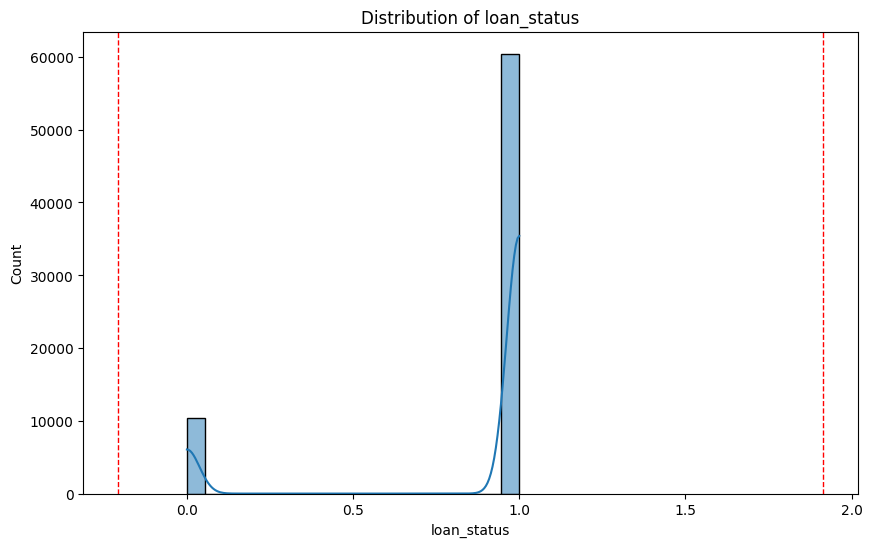

Feature: loan_amnt
There are 629 outliers in the loan_amnt feature, which is 0.89% of the total cases


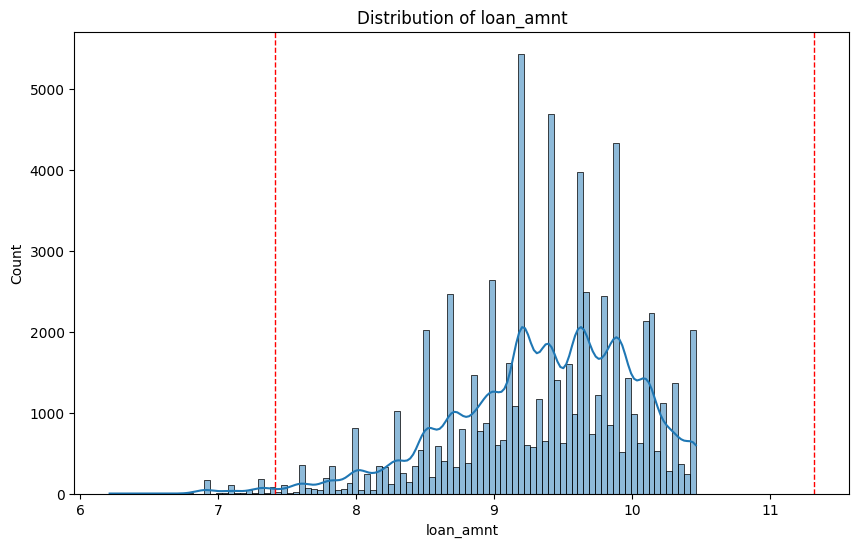

Feature: int_rate
There are 25 outliers in the int_rate feature, which is 0.04% of the total cases


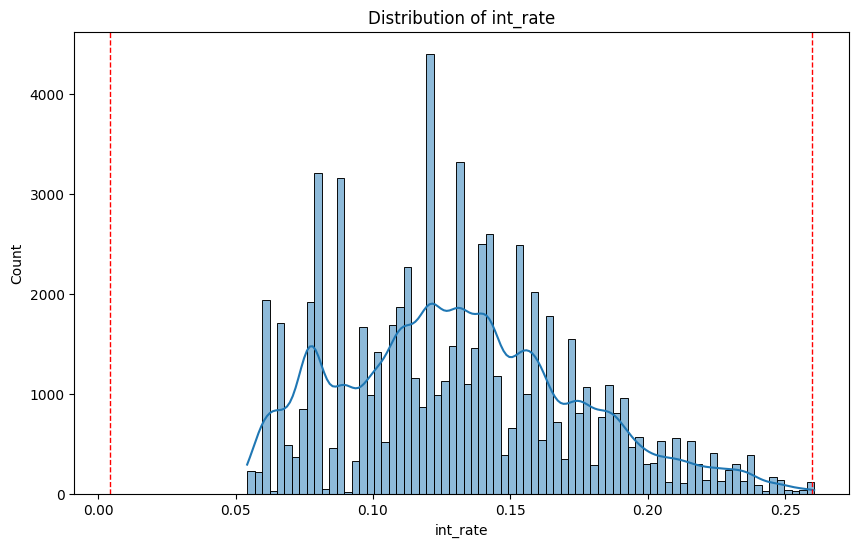

Feature: fico_range_low
There are 567 outliers in the fico_range_low feature, which is 0.80% of the total cases


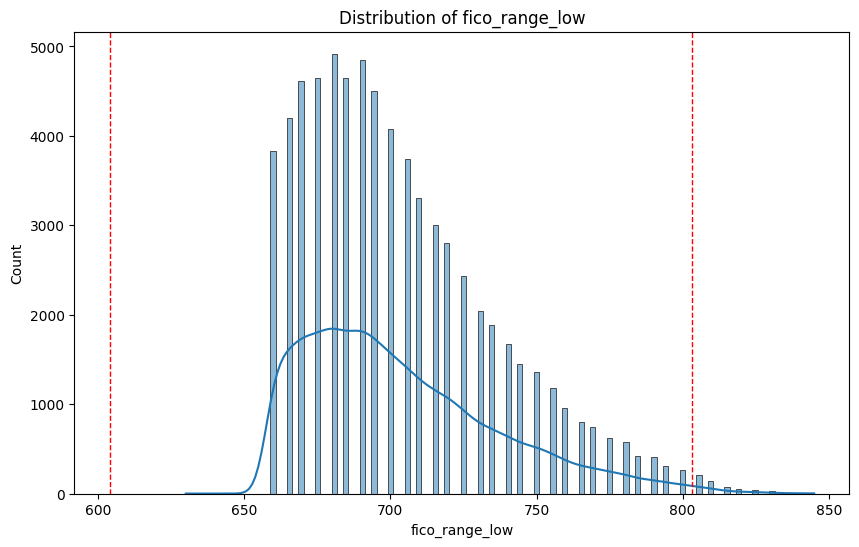

Feature: inq_last_6mths
There are 1193 outliers in the inq_last_6mths feature, which is 1.68% of the total cases


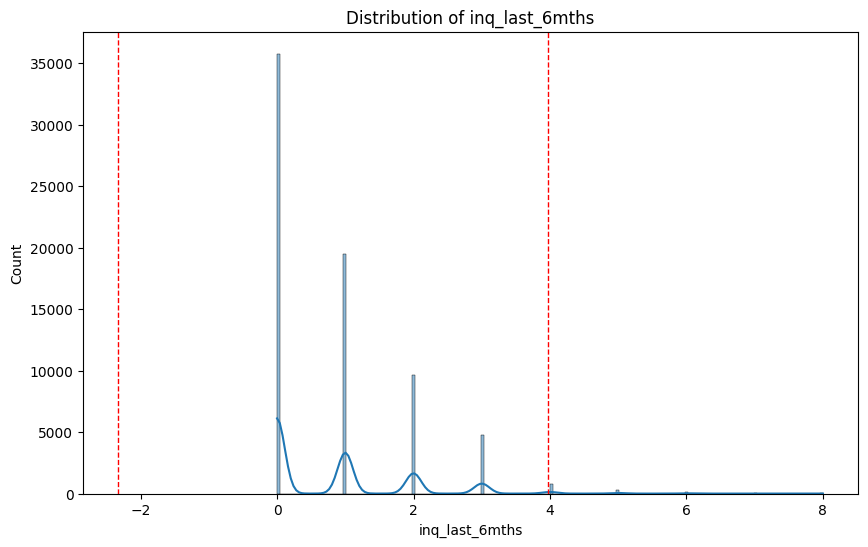

Feature: revol_util
There are 0 outliers in the revol_util feature, which is 0.00% of the total cases


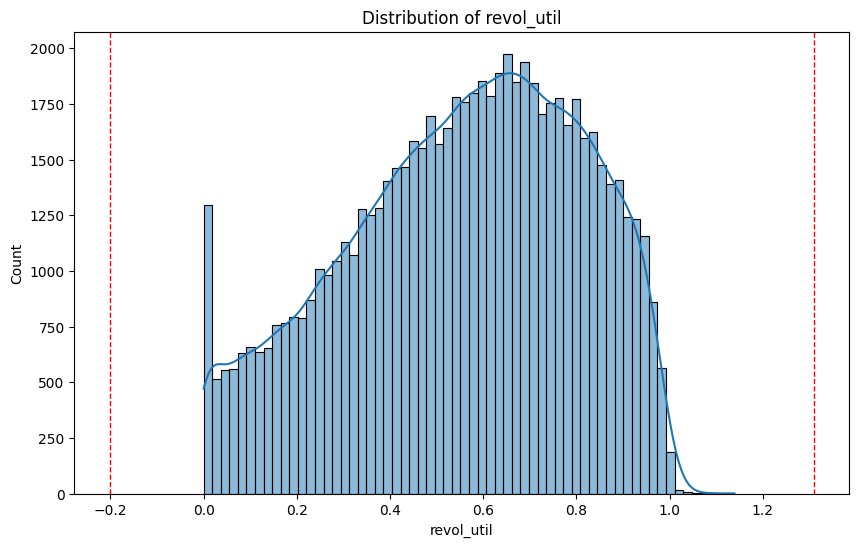

Feature: delinq_2yrs
There are 948 outliers in the delinq_2yrs feature, which is 1.34% of the total cases


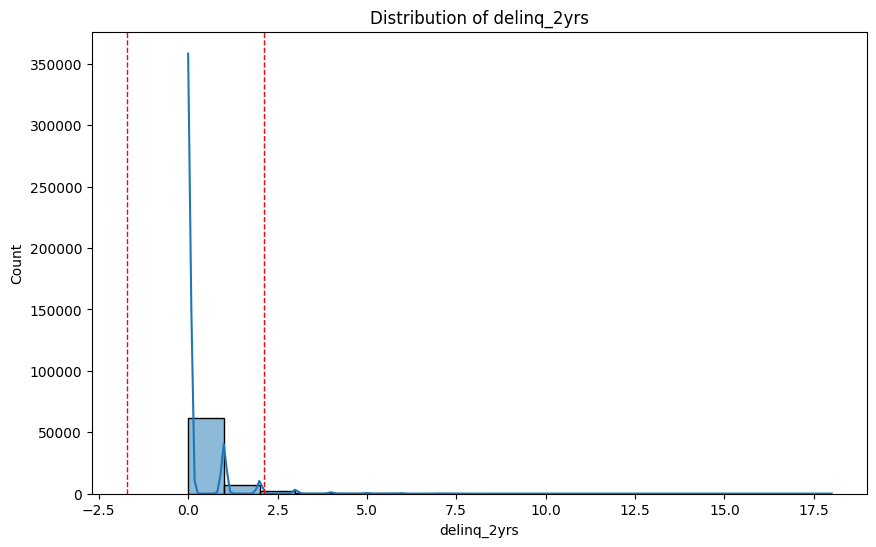

Feature: pub_rec
There are 398 outliers in the pub_rec feature, which is 0.56% of the total cases


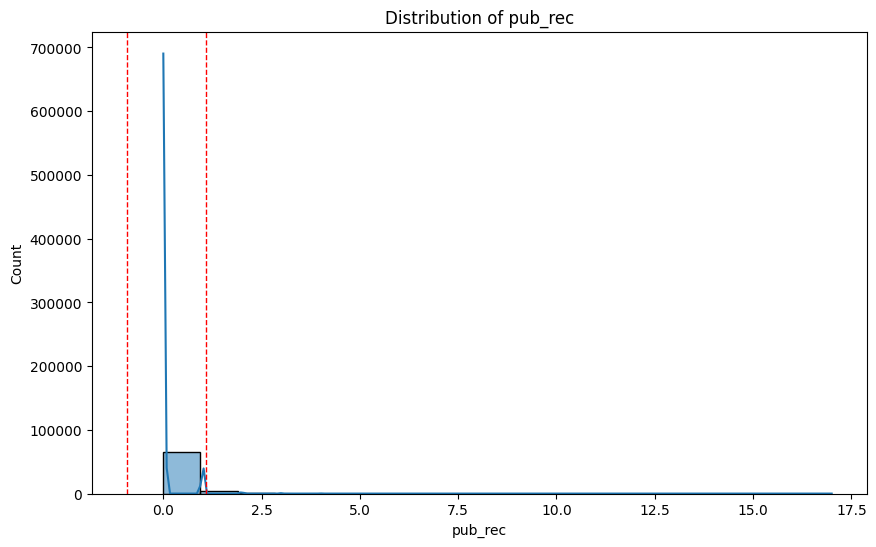

Feature: open_acc
There are 631 outliers in the open_acc feature, which is 0.89% of the total cases


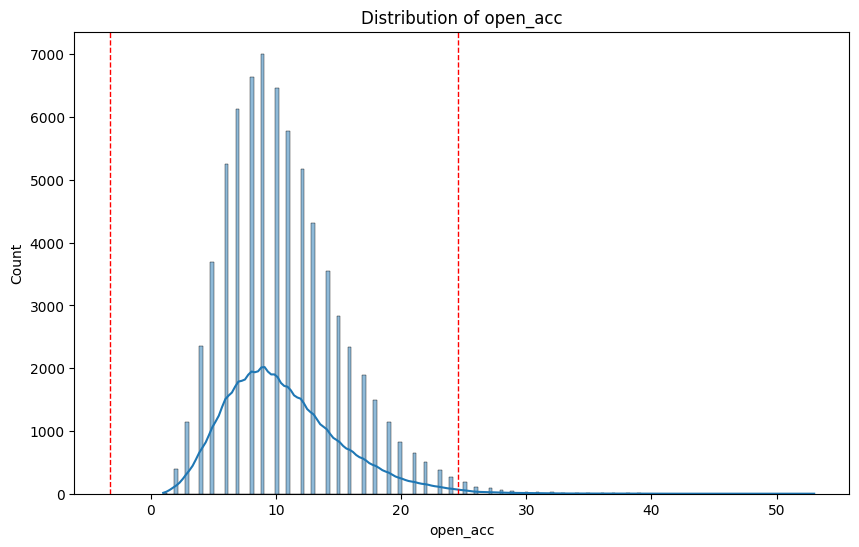

Feature: total_acc
There are 668 outliers in the total_acc feature, which is 0.94% of the total cases


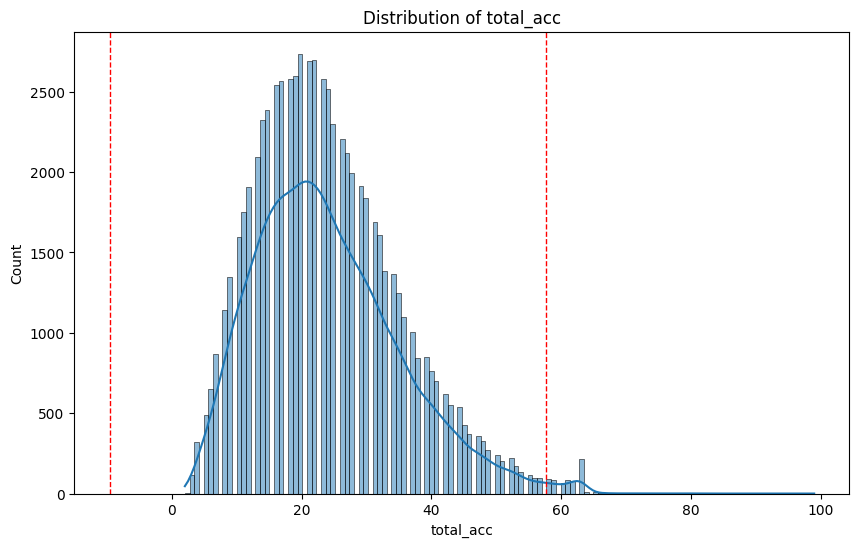

Feature: annual_inc
There are 506 outliers in the annual_inc feature, which is 0.71% of the total cases


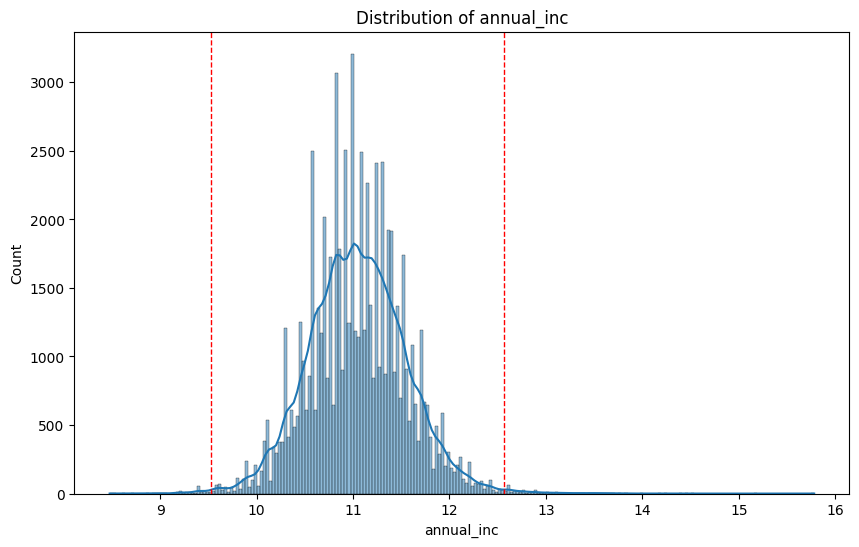

Feature: emp_length
There are 0 outliers in the emp_length feature, which is 0.00% of the total cases


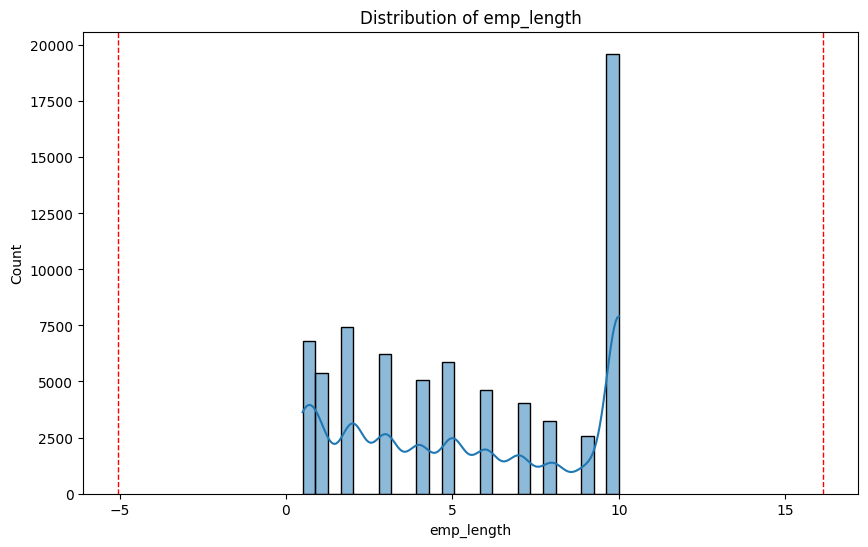

Feature: dti
There are 0 outliers in the dti feature, which is 0.00% of the total cases


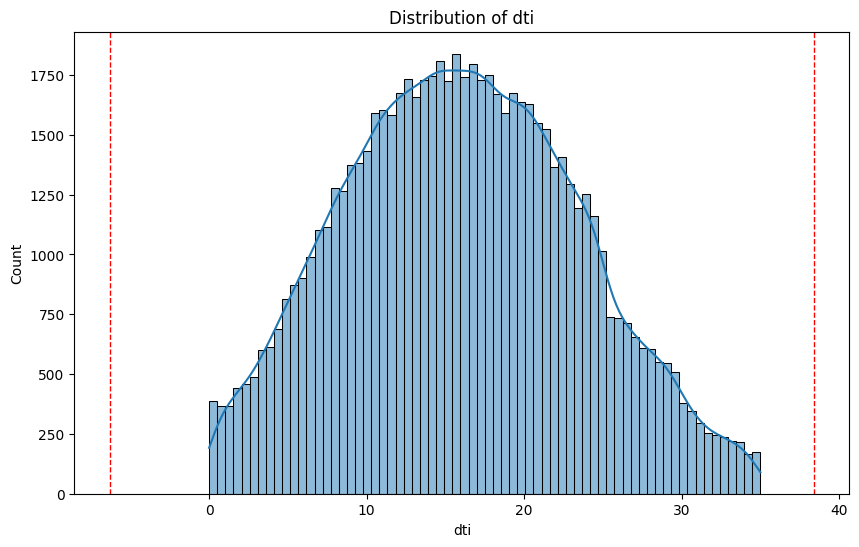

Feature: credit_age
There are 878 outliers in the credit_age feature, which is 1.24% of the total cases


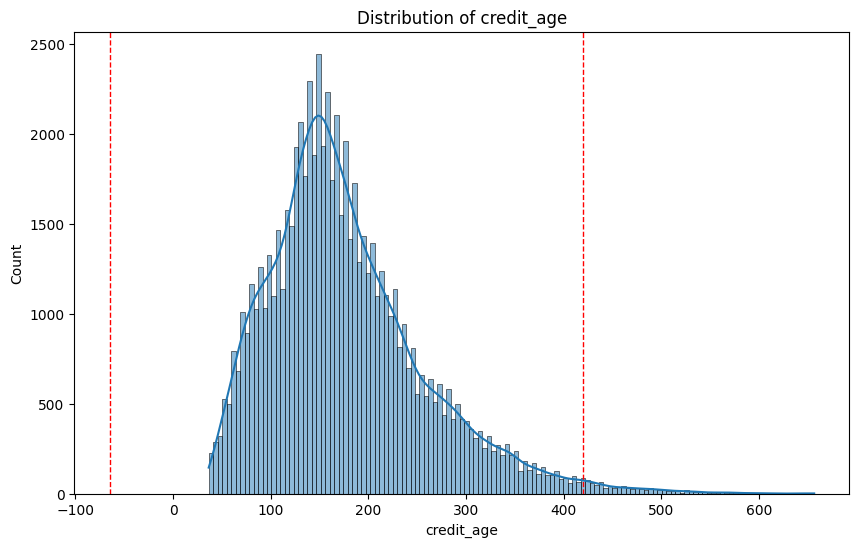

Feature: revolving_income_ratio
There are 1058 outliers in the revolving_income_ratio feature, which is 1.49% of the total cases


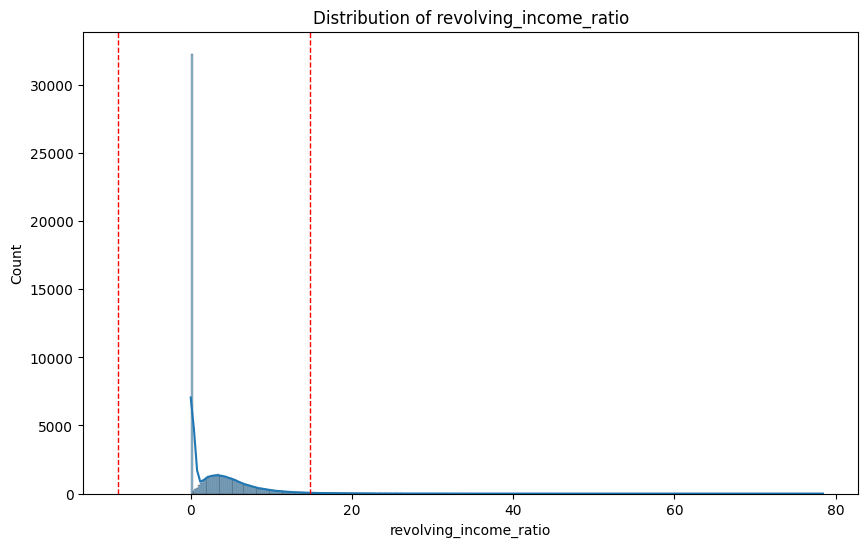

Feature: desc_length
There are 1504 outliers in the desc_length feature, which is 2.12% of the total cases


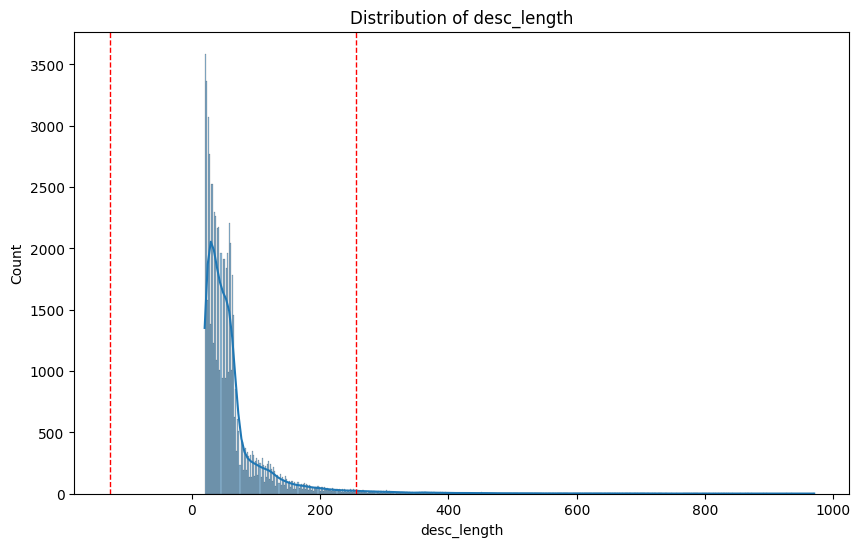

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

def detect_outliers(data):
    for column in data.select_dtypes(include=['float64', 'int64']).columns:
        mean = data[column].mean()
        std = data[column].std()
        outliers = data[(data[column] > mean + 3 * std) | (data[column] < mean - 3 * std)]
        
        print(f"Feature: {column}")
        print(f"There are {len(outliers)} outliers in the {column} feature, which is {len(outliers) / len(data) * 100:.2f}% of the total cases")
        
        plt.figure(figsize=(10, 6))
        sns.histplot(data[column], kde=True)
        plt.title(f"Distribution of {column}")
        plt.axvline(mean + 3 * std, color='r', linestyle='dashed', linewidth=1)
        plt.axvline(mean - 3 * std, color='r', linestyle='dashed', linewidth=1)
        plt.show()

detect_outliers(processed_data)

In [14]:
import numpy as np
from scipy.spatial.distance import mahalanobis

# Calculate the mean vector and covariance matrix
mean_vector = processed_data_wo_desc.mean(axis=0)
cov_matrix = processed_data_wo_desc.cov().values

# Invert the covariance matrix
inv_cov_matrix = np.linalg.inv(cov_matrix)

# Function to calculate Mahalanobis distance
def calculate_mahalanobis_distance(data, mean_vector, inv_cov_matrix):
    distances = []
    for i in range(len(data)):
        diff = data.iloc[i] - mean_vector
        distance = mahalanobis(diff, np.zeros_like(diff), inv_cov_matrix)
        distances.append(distance)
    return np.array(distances)

# Calculate Mahalanobis distances for the dataset
mahalanobis_distances = calculate_mahalanobis_distance(processed_data_wo_desc, mean_vector, inv_cov_matrix)

# Define a threshold for out-of-distribution points (e.g., 3 standard deviations)
threshold = np.mean(mahalanobis_distances) + 3 * np.std(mahalanobis_distances)

# Identify out-of-distribution points
out_of_distribution_points = processed_data_wo_desc[mahalanobis_distances > threshold]

print(f"Number of out-of-distribution points: {len(out_of_distribution_points)}")
display(out_of_distribution_points)

c:\Users\Jonah\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\spatial\distance.py:1062: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(m)


Number of out-of-distribution points: 0


,loan_status,loan_amnt,int_rate,fico_range_low,inq_last_6mths,revol_util,delinq_2yrs,pub_rec,open_acc,total_acc,...,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,home_ownership_MORTGAGE,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified
